In [37]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [38]:
dataframe = pd.read_pickle("../../datasets/All.pickle")
#drop date so we get no error later 
dataframe = dataframe.drop(columns="DateTime")

In [39]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers.experimental import preprocessing

In [40]:
# shuffle data
shuffled_data = shuffle(dataframe)

# divide into features and labels
Y = shuffled_data.pop("NO2-ug-per-m3").to_frame()
X = shuffled_data

# separate into train and test set
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.05)

In [41]:
def create_dense_model():
    tf.keras.backend.set_floatx('float64')
    
    #normalizer = preprocessing.Normalization(input_shape=[shuffled_data.shape[1]])
    #normalizer.adapt(np.array(shuffled_data))
    
    model = tf.keras.Sequential()
    #model.add(tf.keras.layers.Input(shape=shuffled_data.shape[1]))
    #model.add(normalizer)
    model.add(tf.keras.layers.Dense(1024, activation="relu"))
    model.add(tf.keras.layers.Dense(512, activation="relu"))
    model.add(tf.keras.layers.Dense(256, activation="relu"))
    model.add(tf.keras.layers.Dense(128, activation="relu"))
    model.add(tf.keras.layers.Dense(1, activation="linear"))
    
    adam = tf.keras.optimizers.Adam(lr=0.001)
    model.compile(optimizer=adam, loss='mean_absolute_error')
    return model

def create_simple_model():
    tf.keras.backend.set_floatx('float64')
    
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Dense(4, activation="relu"))
    model.add(tf.keras.layers.Dense(1, activation="linear"))
    
    adam = tf.keras.optimizers.Adam(lr=0.001)
    model.compile(optimizer=adam, loss='mean_absolute_error')
    return model

In [42]:

model = create_dense_model()
#model = create_simple_model()

# 5% of data for the dev set so we can optimize against it
history = model.fit(x_train, y_train, epochs=100, validation_split=0.05)

Epoch 1/100
228/228 [==============================] - 2s 9ms/step - loss: 258.4445 - val_loss: 18.7842
Epoch 2/100
228/228 [==============================] - 2s 8ms/step - loss: 30.2231 - val_loss: 25.2997
Epoch 3/100
228/228 [==============================] - 2s 8ms/step - loss: 19.8040 - val_loss: 34.3448
Epoch 4/100
228/228 [==============================] - 2s 8ms/step - loss: 18.3115 - val_loss: 17.3237
Epoch 5/100
228/228 [==============================] - 2s 8ms/step - loss: 18.2076 - val_loss: 30.3247
Epoch 6/100
228/228 [==============================] - 2s 8ms/step - loss: 18.6170 - val_loss: 18.0266
Epoch 7/100
228/228 [==============================] - 2s 8ms/step - loss: 17.3565 - val_loss: 15.9289
Epoch 8/100
228/228 [==============================] - 2s 8ms/step - loss: 16.9044 - val_loss: 14.9926
Epoch 9/100
228/228 [==============================] - 2s 8ms/step - loss: 15.8958 - val_loss: 19.8203
Epoch 10/100
228/228 [==============================] - 2s 9ms/step - lo

Epoch 80/100
228/228 [==============================] - 2s 8ms/step - loss: 12.3662 - val_loss: 12.8287
Epoch 81/100
228/228 [==============================] - 2s 8ms/step - loss: 12.6151 - val_loss: 13.0754
Epoch 82/100
228/228 [==============================] - 2s 8ms/step - loss: 12.5891 - val_loss: 12.0111
Epoch 83/100
228/228 [==============================] - 2s 8ms/step - loss: 12.3949 - val_loss: 12.4147
Epoch 84/100
228/228 [==============================] - 2s 8ms/step - loss: 12.3428 - val_loss: 12.1761
Epoch 85/100
228/228 [==============================] - 2s 9ms/step - loss: 12.2807 - val_loss: 12.5665
Epoch 86/100
228/228 [==============================] - 2s 9ms/step - loss: 12.6838 - val_loss: 11.7869
Epoch 87/100
228/228 [==============================] - 2s 8ms/step - loss: 12.3855 - val_loss: 12.2215
Epoch 88/100
228/228 [==============================] - 2s 8ms/step - loss: 12.2206 - val_loss: 11.9062
Epoch 89/100
228/228 [==============================] - 2s 8ms/s

In [43]:
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.ylim([0, 120])
    plt.xlabel('Epoch')
    plt.ylabel('MAE [NO2-ug-per-m3]')
    plt.legend()
    plt.grid(True)

# function that plots a number (dist) of samples and how the prediction of the model is accordning to the correct data
def plot_prediction(pred_data, correct_data, dist):
    plt.plot(pred_data[:dist], label='prediction')
    plt.plot(correct_data[:dist], label='actual data')
    plt.ylim([0, 100])
    plt.xlabel('Datapoint')
    plt.ylabel('NO2-ug-per-m3')
    plt.legend()
    plt.grid(True)

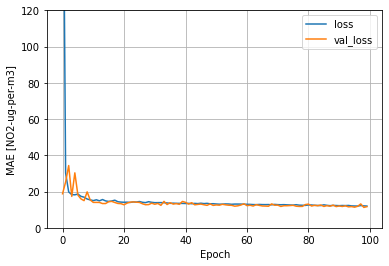

In [44]:
plot_loss(history)

13/13 [==============================] - 0s 3ms/step - loss: 11.7540


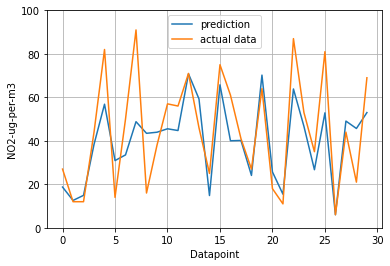

In [45]:
# evaluate against the test set
eval_model = model.evaluate(x_test, y_test)
predictions = model.predict(x_test)
plot_prediction(predictions, np.array(y_test), 30)

In [46]:
### Error Analysis
# compute the error in sales and merge it again with it features
error = np.abs(np.array(y_test) - predictions)
error_data = x_test.copy()
error_data["Error"] = error
error_data["NO2"] = y_test
# sort the data according to Error values
error_data = error_data.sort_values("Error")
error_data

,Cars-Direction-1,Cars-Direction-2,Cars-Total,Day-Of-Week,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,...,DaySin,DayCos,WeekSin,WeekCos,MonthSin,MonthCos,YearSin,YearCos,Error,NO2
DateTime,,,,,,,,,,,,,,,,,,,,,
2019-10-25 04:00:00,44,30,74,5,0,0,0,0,1,0,...,0.866025,5.000000e-01,-0.433884,-0.900969,0.897805,-0.440394,-9.141280e-01,0.405426,0.004439,14.0
2019-01-13 17:00:00,306,305,611,7,0,0,0,0,0,0,...,-0.965926,-2.588190e-01,-0.781831,0.623490,0.201299,0.979530,2.219215e-01,0.975065,0.019921,27.0
2019-03-15 00:00:00,14,20,34,5,0,0,0,0,1,0,...,0.000000,1.000000e+00,-0.433884,-0.900969,0.571268,0.820763,9.562348e-01,0.292600,0.024642,6.0
2019-02-26 23:00:00,26,37,63,2,0,1,0,0,0,0,...,-0.258819,9.659258e-01,0.781831,0.623490,0.433884,0.900969,8.311706e-01,0.556017,0.066894,65.0
2019-12-04 06:00:00,519,372,891,3,0,0,1,0,0,0,...,1.000000,6.123234e-17,0.974928,-0.222521,0.651372,-0.758758,-4.482293e-01,0.893919,0.097244,56.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-31 18:00:00,181,175,356,2,0,1,0,0,0,0,...,-1.000000,-1.836970e-16,0.781831,0.623490,0.651372,-0.758758,-2.449294e-16,1.000000,44.687850,88.0
2019-01-05 13:00:00,472,454,926,6,0,0,0,0,0,1,...,-0.258819,-9.659258e-01,-0.974928,-0.222521,0.201299,0.979530,8.596480e-02,0.996298,46.267388,95.0
2019-06-12 16:00:00,742,741,1483,3,0,0,1,0,0,0,...,-0.866025,-5.000000e-01,0.974928,-0.222521,0.951057,0.309017,3.294085e-01,-0.944188,46.615148,98.0


In [47]:
# error_data.to_csv("error_data.csv")

<AxesSubplot:>

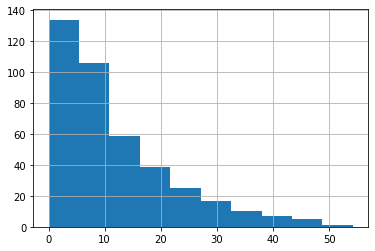

In [48]:
error_data["Error"].hist()